### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

In [2]:
import sklearn.datasets as dtsets
boston = dtsets.load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,learning_rate=250,random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

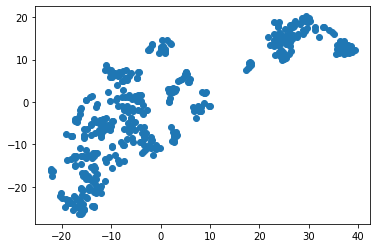

In [6]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [7]:
from sklearn.cluster import KMeans

In [8]:
#разбиваю данные на 2 кластера
model = KMeans(n_clusters=2, max_iter=100, random_state=42)
labels_train = model.fit_predict(X_train_scaled)
#заготовка на 3 задание
labels_test = model.predict(X_test_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

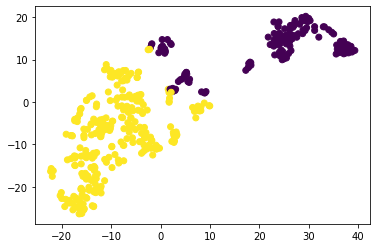

In [9]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [10]:
print('cluster #', 'mean price       ', 'mean crim')
print('cluster_0', y_train[labels_train==0].price.mean(), X_train[labels_train==0].CRIM.mean())
print('cluster_1', y_train[labels_train==1].price.mean(), X_train[labels_train==1].CRIM.mean())

cluster # mean price        mean crim
cluster_0 16.49347826086957 10.03253507246377
cluster_1 26.06654135338346 0.2766786090225563


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
print('cluster #', 'mean price        ', 'mean crim')
print('cluster_0', y_test[labels_test==0].price.mean(), X_test[labels_test==0].CRIM.mean())
print('cluster_1', y_test[labels_test==1].price.mean(), X_test[labels_test==1].CRIM.mean())

cluster # mean price         mean crim
cluster_0 16.76410256410256 9.180189743589745
cluster_1 24.412698412698415 0.19570111111111108
